## Exercise Set 2 for OSM 

### Dynamic Programming with John Stachurski

Exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

### Exercise 1

Consider the setting of the [stochastic optimal growth model](https://lectures.quantecon.org/py/optgrowth.html), with the same notation and same assumptions on the primitives $u$, $f$, $\beta$ and $\phi$. 

Let $\mathscr C$ be all continuous bounded functions on $\mathbb R_+$.

Let $\sigma \in \Sigma$ be any feasible policy and let $U$ be the operator from $\mathscr C$ to itself defined by

$$ Uw(y) = u(\sigma(y)) + \beta \int w(f(y - \sigma(y))z) \phi(dz) \qquad (y \in \mathbb R_+)$$

Prove that $U$ is a contraction mapping with respect to the supremum distance.  Argue that the unique fixed point of $U$ in $\mathscr C$ is $v_\sigma$.

("Argue" means provide a sketch of a proof that contains the key ideas, plus some intuition.  Or give a complete, formal proof, if you can.)

This involves the fixed point theorem of functions. Firstly, we have to show that the space (C, ||.||sup) is a complete (this should require continous and bounded). Then we have to show that the operator U is a contraction mapping on this space. This requires us to show that given two different value function  $w_1(y)$ and $w_2(y)$, we have to show that $$ ||Uw_1(y) - Uw_2(y)||_{sup} \leq ||w_1(y) - w_2(y)||_{sup}$$.

### Exercise 2

Notation and concepts continue from exercise 2.

Use the fact you proved in exercise 2, combined with piecewise linear interpolation method we used for the Bellman operator, to compute and plot good approximations of the value $v_\sigma$ of the policies

* $\sigma_1(y) = 0.95 y$
* $\sigma_2(y) = H(y) y$ where $H$ is the cdf of the lognormal $LN(0, 0.5)$ distribution.

For the latter use `scipy.stats.lognorm.cdf(y, 0.5)`

For the primitives, use the default specification in the `LogLinearOG` class from the [stochastic optimal growth model lecture](https://lectures.quantecon.org/py/optgrowth.html).

Plot your results, choosing grid and plotting dimensions to best illustrate the two functions.  Based on the plot alone, argue that neither of these policies is an optimal policy.

In [21]:
import scipy
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

def operator(sigma, grid, params):
    u, f, beta, alpha, shock = params
    v_init = u(grid)
    v_now = v_init
    v_prev = np.zeros(grid.shape[0])
    val_func = lambda x: np.interp(x, grid, v_now)
    
    while abs((v_now - v_prev).sum()) > 1e-8:
        v_prev = v_now.copy()
        for i, y in enumerate(grid):
            v_now[i] = u(sigma(y)) + beta * np.mean(val_func(shock * f(y - sigma(y), alpha)))
        val_func = lambda x: np.interp(x, grid, v_now)
    print(abs((v_now - v_prev).sum()))
    return v_now, val_func

def sigma1(x):
    return 0.95 * x

def sigma2(x):
    return scipy.stats.lognorm.cdf(x, 0.5) * x

def f(x, alpha):
    return x ** alpha

alpha=0.4
beta=0.96
mu=0
s=0.1

grid_max = 6        # Largest grid point
grid_size = 200      # Number of grid points
shock_size = 250     # Number of shock draws in Monte Carlo integral

grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))

params = (np.log, f, beta, alpha, shocks)
v_now1, val_func1 = operator(sigma1, grid, params)
v_now2, val_func2 = operator(sigma2, grid, params)

9.87810011566e-09
9.49985690113e-09


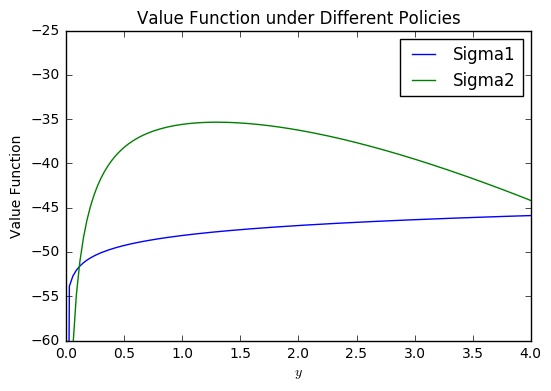

In [26]:
plt.plot(grid, v_now1, label = 'Sigma1')
plt.plot(grid, v_now2, label = 'Sigma2')
plt.ylim((-60, -25))
plt.xlim((0, 4))
plt.legend(loc = 'upper right')
plt.xlabel(r'$y$')
plt.ylabel('Value Function')
plt.title('Value Function under Different Policies')
plt.show()

Clearly, these two are not optimal policy. If they were optimal policy, then the value function would have larger value on the entire domain. But they have crossing points meaning they are not optimal in a certain region since the agent can choose a policy such that she chooses to follow the policy that would give her the largest expected utility on each region. This policy strictly dominates these two policies. Then these two policies are not optimal.